## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# Resolva o problema de classificação binária sobre o dataset:
[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

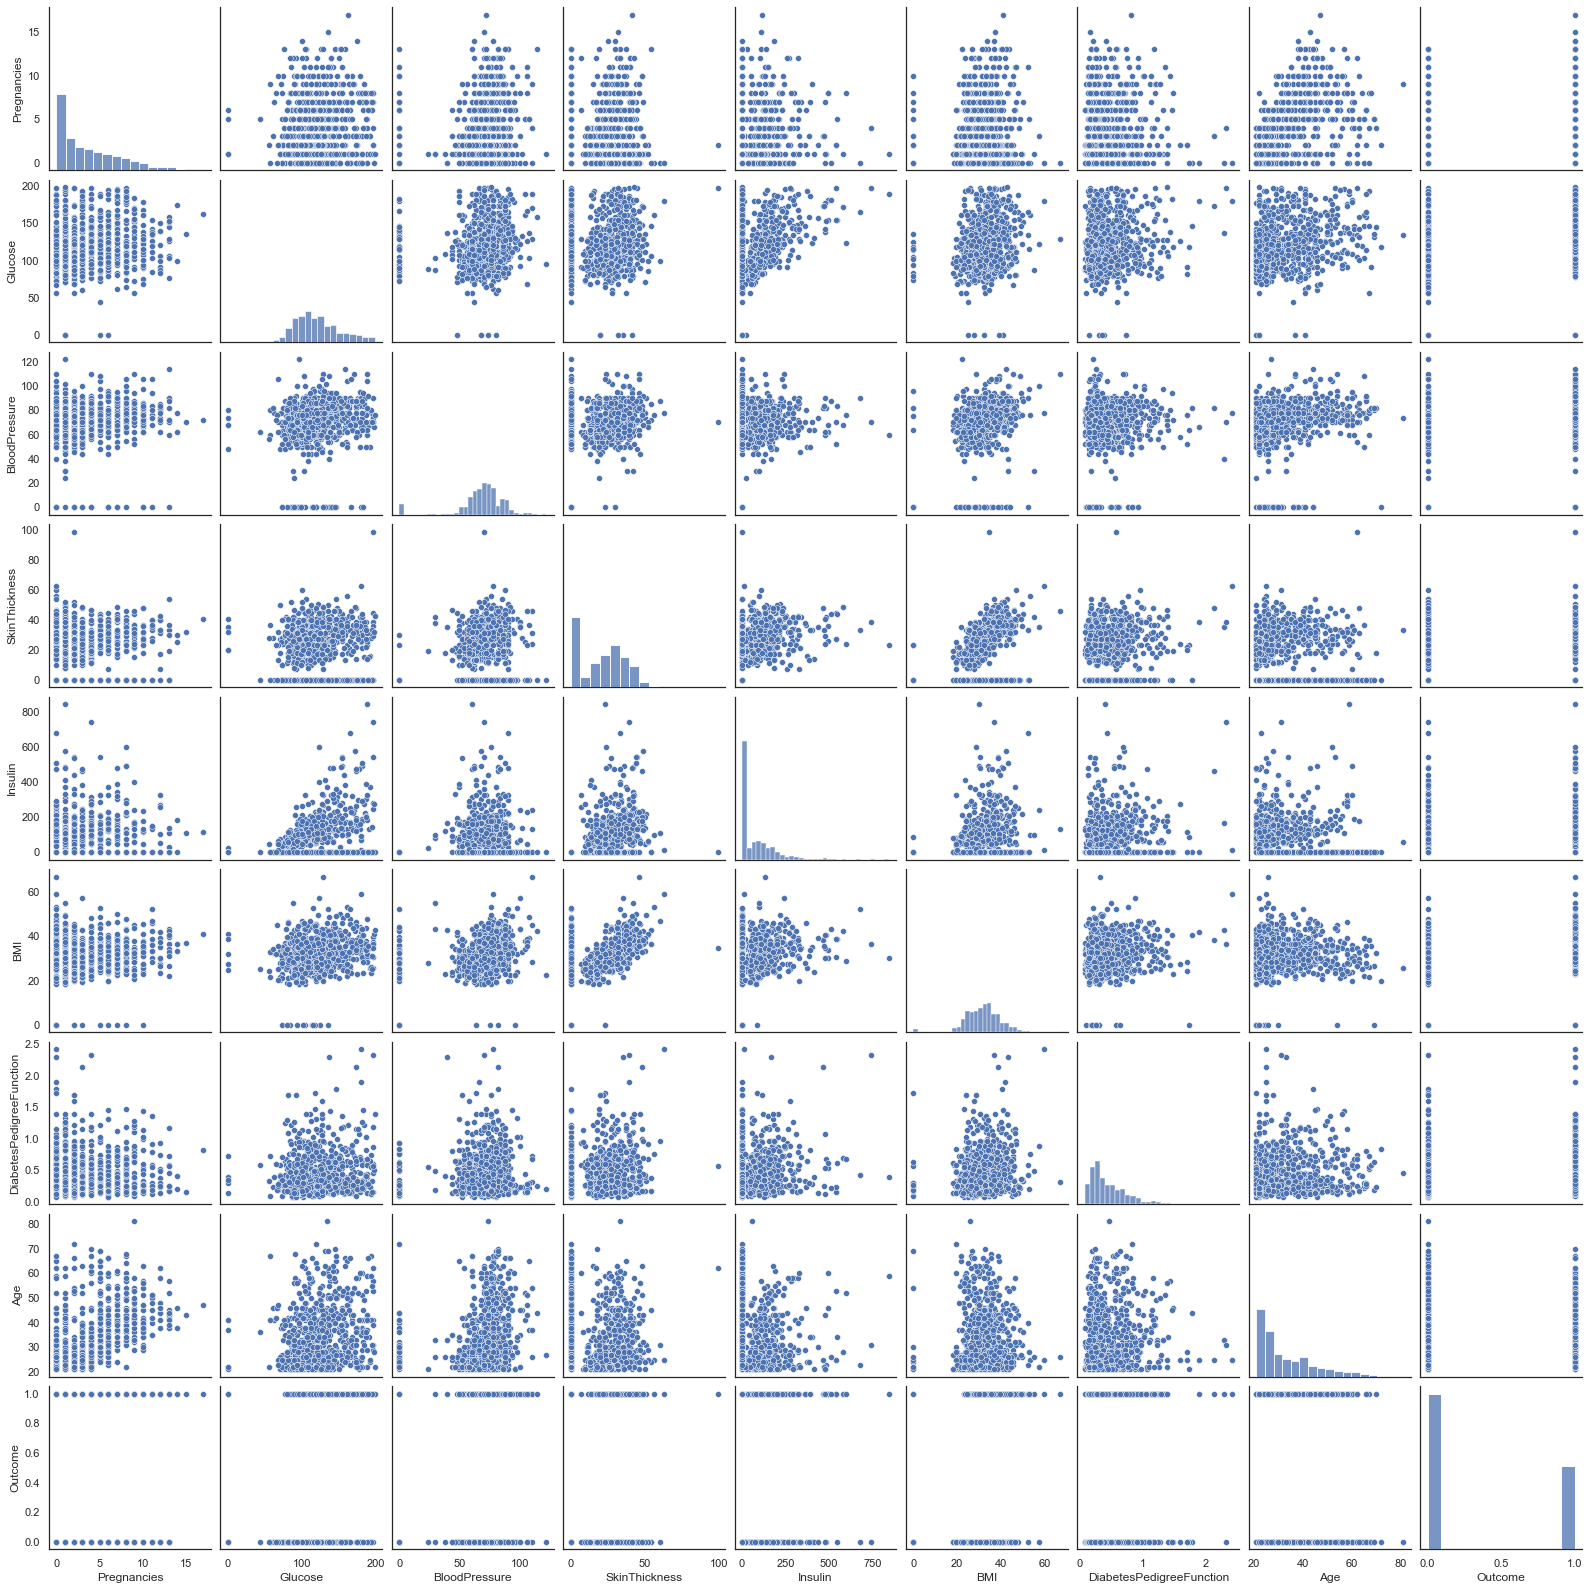

In [33]:
#eda(exploratory data analysis)
sns.pairplot(df)

<AxesSubplot:>

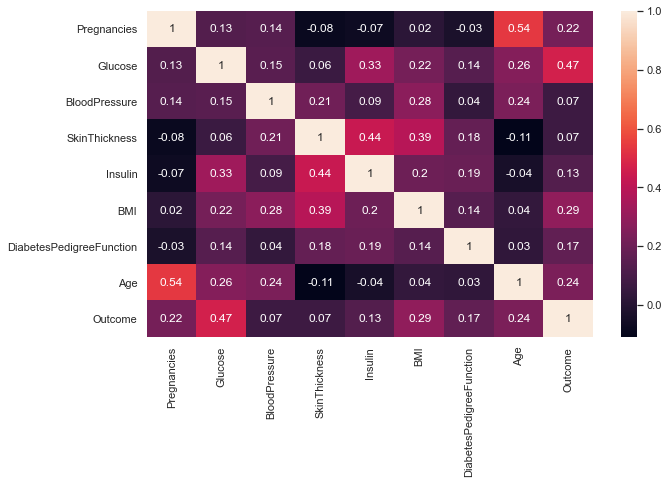

In [34]:
#Calcular a correlação de pares de todas as colunas
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True)

## 1. Separe os dados em treino (80%) e teste (20%).

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X, y = df.drop(columns='Outcome', axis=1), df['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 2. Crie os modelos a seguir sobre o conjunto de treino e calcule F1-Score sobre os dados de treino e de teste usando:

In [10]:
from sklearn.model_selection import GridSearchCV

### 1. Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
hyperparameters = {
    'max_depth': [80, 100, 120],
    'n_estimators': [100, 500, 1000]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, hyperparameters)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=80, random_state=42)


In [13]:
model = grid_search.best_estimator_

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Treino - Accuracy: {acc}, F1: {f1}")

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Teste - Accuracy: {acc}, F1: {f1}")

Treino - Accuracy: 1.0, F1: 1.0
Teste - Accuracy: 0.7597402597402597, F1: 0.6336633663366336


### 2. Gradient Boosting do Scikit Learn

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
hyperparameters = {
    'max_depth': [80, 100, 120],
    'n_estimators': [100, 500, 1000]
}

model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(model, hyperparameters)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

GradientBoostingClassifier(max_depth=80, random_state=42)


In [16]:
model = grid_search.best_estimator_

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Treino - Accuracy: {acc}, F1: {f1}")

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Teste - Accuracy: {acc}, F1: {f1}")

Treino - Accuracy: 1.0, F1: 1.0
Teste - Accuracy: 0.7077922077922078, F1: 0.5161290322580646


### 3. XGBoost

In [17]:
!pip install xgboost

In [18]:
from xgboost import XGBClassifier

In [19]:
hyperparameters = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 500, 1000]
}

model = XGBClassifier(random_state=42, objective='reg:logistic')
grid_search = GridSearchCV(model, hyperparameters)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1,
              objective='reg:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [20]:
model = grid_search.best_estimator_

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Treino - Accuracy: {acc}, F1: {f1}")

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Teste - Accuracy: {acc}, F1: {f1}")

Treino - Accuracy: 1.0, F1: 1.0
Teste - Accuracy: 0.7597402597402597, F1: 0.6542056074766356


### 4. LightGBM

In [21]:
!pip install lightgbm

In [22]:
from lightgbm import LGBMClassifier

In [23]:
hyperparameters = {
    'n_estimators': [100, 500, 1000],
    'reg_alpha': [0.1, 0.5],
    'num_leaves': [6, 8, 12, 16]
}

model = LGBMClassifier(random_state=42)
grid_search = GridSearchCV(model, hyperparameters)
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

LGBMClassifier(num_leaves=6, random_state=42, reg_alpha=0.5)


In [24]:
model = grid_search.best_estimator_

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Treino - Accuracy: {acc}, F1: {f1}")

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Teste - Accuracy: {acc}, F1: {f1}")

Treino - Accuracy: 0.8827361563517915, F1: 0.8226600985221675
Teste - Accuracy: 0.7662337662337663, F1: 0.6470588235294118


### 5. CatBoost

In [25]:
!pip install catboost

In [26]:
from catboost import CatBoostClassifier

In [27]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train,
                                                        y_train, 
                                                        shuffle=True,
                                                        random_state=42,
                                                        train_size=0.8,
                                                        stratify=y_train)

In [28]:
model = CatBoostClassifier(iterations=2500,
                        depth=4,
                        leaf_estimation_iterations = 10,
                        use_best_model=True)

model.fit(X_train2, y_train2, logging_level='Silent', eval_set=(X_valid, y_valid))

y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Treino - Accuracy: {acc}, F1: {f1}")

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Teste - Accuracy: {acc}, F1: {f1}")

Treino - Accuracy: 0.8355048859934854, F1: 0.7306666666666667
Teste - Accuracy: 0.7402597402597403, F1: 0.6078431372549019


### 6. Perceptron

In [29]:
from sklearn.linear_model import Perceptron

In [30]:
model = Perceptron(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Treino - Accuracy: {acc}, F1: {f1}")

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Teste - Accuracy: {acc}, F1: {f1}")

Treino - Accuracy: 0.4592833876221498, F1: 0.5426997245179063
Teste - Accuracy: 0.4675324675324675, F1: 0.5494505494505494


### 7. Multi-layer Perceptron


In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
model = MLPClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Treino - Accuracy: {acc}, F1: {f1}")

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Teste - Accuracy: {acc}, F1: {f1}")

Treino - Accuracy: 0.6970684039087948, F1: 0.593886462882096
Teste - Accuracy: 0.6428571428571429, F1: 0.5454545454545455
